In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [20]:
data = {
    'Process': ['UeManager Connection', 'E2Sim Connection', 'xApp Monitoring', 'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 'rApp', 'xApp Handover', 'E2Sim Handover', 'UeManager Connection'],
    'Mean': [0.0003, 0.0003, 0.000155, 1.83, 4.332, 1.324148, 0.722, 1.12632, 0.01734537782, 0.018, 0.05],
    'Std Dev': [0.00001, 0.00001, 0.0001674315781, 0.18, 0.3, 0.05, 0.1, 0.39, 0.00026, 0.002, 0.005]
}
df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="darkgrid")

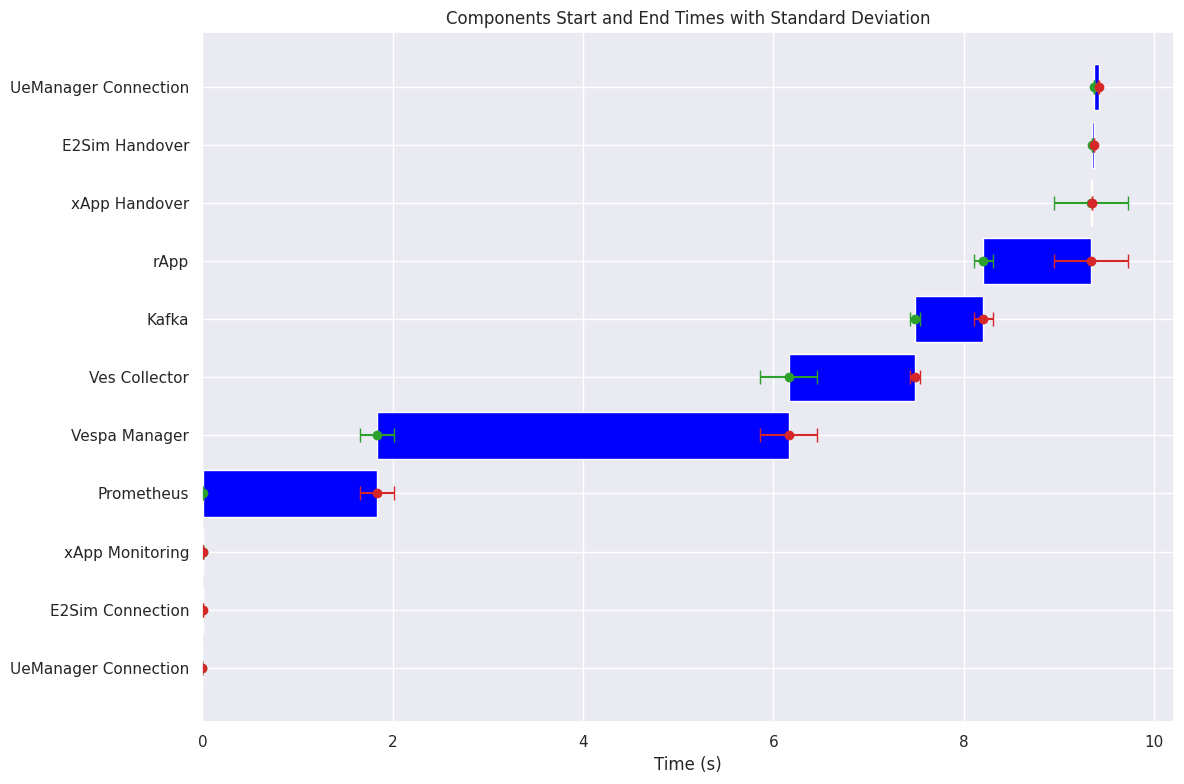

In [24]:
# Adjust data to reflect the process finish and next start
df['End'] = df['Mean'].cumsum()
df['Start'] = df['End'].shift(1, fill_value=0)
df['Prev Std Dev'] = df['Std Dev'].shift(1, fill_value=0)
df['Lower Start'] = df['Start'] - df['Prev Std Dev']
df['Upper End'] = df['End'] + df['Std Dev']

# Prepare the figure
plt.figure(figsize=(12, 8))

# Create bar plot for start and end times
for i, row in df.iterrows():
    plt.barh(i, row['End'] - row['Start'], left=row['Start'], color='blue')
    plt.errorbar(x=row['Start'], y=i, xerr=row['Prev Std Dev'], fmt='o', color='tab:green', capsize=5)
    plt.errorbar(x=row['End'], y=i, xerr=row['Std Dev'], fmt='o', color='tab:red', capsize=5)

# Customize the plot
plt.yticks(range(len(df)), df['Process'])
plt.xlabel('Time (s)')
plt.title('Components Start and End Times')

# Display the plot
plt.tight_layout()
plt.savefig('out/detailed-time.pdf', bbox_inches='tight')
plt.savefig('out/detailed-timer.png', dpi=300, bbox_inches='tight')
plt.show()